In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pulp
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
manvar_costs = pd.read_excel('C:\\Users\\Galaxy Computers\\Downloads\\variable_costs.xlsx', index_col = 0)
manvar_costs

,İstanbul,Samsun,Erzurum,Gaziantep,Antalya,Ankara,İzmir
İstanbul,0,96,97,69,125,91,118
Samsun,80,0,45,35,126,84,96
Erzurum,99,45,0,33,136,98,112
Gaziantep,96,50,48,0,124,93,97
Antalya,93,56,66,39,0,87,77
Ankara,94,42,56,36,115,0,80
İzmir,76,62,78,48,113,88,0


In [3]:
manvar_costs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, İstanbul to İzmir
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   İstanbul   7 non-null      int64
 1   Samsun     7 non-null      int64
 2   Erzurum    7 non-null      int64
 3   Gaziantep  7 non-null      int64
 4   Antalya    7 non-null      int64
 5   Ankara     7 non-null      int64
 6   İzmir      7 non-null      int64
dtypes: int64(7)
memory usage: 448.0+ bytes


In [4]:
manvar_costs.describe()

,İstanbul,Samsun,Erzurum,Gaziantep,Antalya,Ankara,İzmir
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,76.857143,50.142857,55.714286,37.142857,105.571429,77.285714,82.857143
std,34.949624,28.533189,30.510732,20.570436,47.169401,34.378842,39.507082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,43.500000,46.500000,34.000000,114.000000,85.500000,78.500000
50%,93.000000,50.000000,56.000000,36.000000,124.000000,88.000000,96.000000
75%,95.000000,59.000000,72.000000,43.500000,125.500000,92.000000,104.500000
max,99.000000,96.000000,97.000000,69.000000,136.000000,98.000000,118.000000


In [5]:
freight_costs = pd.read_excel('C:\\Users\\Galaxy Computers\\Downloads\\freight_costs.xlsx', index_col = 0)
freight_costs

,İstanbul,Samsun,Erzurum,Gaziantep,Antalya,Ankara,İzmir
İstanbul,0,732,1228,1140,695,444,479
Samsun,732,0,553,690,857,403,1097
Erzurum,1228,553,0,625,1205,862,1594
Gaziantep,1140,690,625,0,827,706,1116
Antalya,695,857,1205,827,0,507,459
Ankara,444,403,862,706,507,0,588
İzmir,479,1097,1594,1116,459,588,0


In [6]:
freight_costs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, İstanbul to İzmir
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   İstanbul   7 non-null      int64
 1   Samsun     7 non-null      int64
 2   Erzurum    7 non-null      int64
 3   Gaziantep  7 non-null      int64
 4   Antalya    7 non-null      int64
 5   Ankara     7 non-null      int64
 6   İzmir      7 non-null      int64
dtypes: int64(7)
memory usage: 448.0+ bytes


In [7]:
freight_costs.describe()

,İstanbul,Samsun,Erzurum,Gaziantep,Antalya,Ankara,İzmir
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,674.000000,618.857143,866.714286,729.142857,650.000000,501.428571,761.857143
std,422.902274,350.502225,529.460012,381.357413,379.398208,271.969273,534.256938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,461.500000,478.000000,589.000000,657.500000,483.000000,423.500000,469.000000
50%,695.000000,690.000000,862.000000,706.000000,695.000000,507.000000,588.000000
75%,936.000000,794.500000,1216.500000,971.500000,842.000000,647.000000,1106.500000
max,1228.000000,1097.000000,1594.000000,1140.000000,1205.000000,862.000000,1594.000000


In [8]:
var_cost = pd.read_excel('C:\\Users\\Galaxy Computers\\Downloads\\variable_costs.xlsx', index_col = 0)
var_cost

,İstanbul,Samsun,Erzurum,Gaziantep,Antalya,Ankara,İzmir
İstanbul,0,96,97,69,125,91,118
Samsun,80,0,45,35,126,84,96
Erzurum,99,45,0,33,136,98,112
Gaziantep,96,50,48,0,124,93,97
Antalya,93,56,66,39,0,87,77
Ankara,94,42,56,36,115,0,80
İzmir,76,62,78,48,113,88,0


In [9]:
var_cost.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, İstanbul to İzmir
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   İstanbul   7 non-null      int64
 1   Samsun     7 non-null      int64
 2   Erzurum    7 non-null      int64
 3   Gaziantep  7 non-null      int64
 4   Antalya    7 non-null      int64
 5   Ankara     7 non-null      int64
 6   İzmir      7 non-null      int64
dtypes: int64(7)
memory usage: 448.0+ bytes


In [10]:
var_cost.describe()

,İstanbul,Samsun,Erzurum,Gaziantep,Antalya,Ankara,İzmir
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,76.857143,50.142857,55.714286,37.142857,105.571429,77.285714,82.857143
std,34.949624,28.533189,30.510732,20.570436,47.169401,34.378842,39.507082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,43.500000,46.500000,34.000000,114.000000,85.500000,78.500000
50%,93.000000,50.000000,56.000000,36.000000,124.000000,88.000000,96.000000
75%,95.000000,59.000000,72.000000,43.500000,125.500000,92.000000,104.500000
max,99.000000,96.000000,97.000000,69.000000,136.000000,98.000000,118.000000


In [11]:
cap = pd.read_excel('C:\\Users\\Galaxy Computers\\Downloads\\capacity.xlsx', index_col = 0)
cap

,Low,High
İstanbul,35,47
Samsun,25,29
Erzurum,27,28
Gaziantep,22,24
Antalya,18,24
Ankara,24,25
İzmir,16,29


In [12]:
cap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, İstanbul to İzmir
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Low     7 non-null      int64
 1   High    7 non-null      int64
dtypes: int64(2)
memory usage: 168.0+ bytes


In [13]:
fixed_costs = pd.read_excel('C:\\Users\\Galaxy Computers\\Downloads\\fixed_cot.xlsx', index_col = 0)
fixed_costs

,Low,High
İstanbul,18,22
Samsun,11,16
Erzurum,12,15
Gaziantep,10,13
Antalya,20,25
Ankara,18,20
İzmir,17,19


In [14]:
fixed_costs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, İstanbul to İzmir
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Low     7 non-null      int64
 1   High    7 non-null      int64
dtypes: int64(2)
memory usage: 168.0+ bytes


In [15]:
demand = pd.read_excel('C:\\Users\\Galaxy Computers\\Downloads\\demand.xlsx', index_col = 0)
demand

,Demand
Cities,
İstanbul,39
Samsun,13
Erzurum,11
Gaziantep,9
Antalya,22
Ankara,14
İzmir,31


In [16]:
#Using debugging to remove errors

In [17]:
fixed_costs.columns = fixed_costs.columns.str.strip()
fixed_costs.index = fixed_costs.index.str.strip()

In [18]:
var_cost.index = var_cost.index.str.strip()
var_cost.columns = var_cost.columns.str.strip()


In [19]:
demand.columns = demand.columns.str.strip()
demand.index = demand.index.str.strip()

In [20]:
cap.columns = cap.columns.str.strip()
cap.index = cap.index.str.strip()    

In [21]:
loc = ['İstanbul', 'Samsun', 'Erzurum', 'Gaziantep', 'Antalya', 'Ankara', 'İzmir']
size = ['Low', 'High']

# Initialize Class
model = LpProblem("Capacitated Plant Location Model", LpMinimize)


# Create Decision Variables
x = LpVariable.dicts("production_", [(i,j) for i in loc for j in loc],
                     lowBound=0, upBound=None, cat='continuous')
y = LpVariable.dicts("plant_", 
                     [(i,s) for s in size for i in loc], cat='Binary')

# Define Objective Function
model += (lpSum([fixed_costs.loc[i,s] * y[(i,s)]  for s in size for i in loc])
          + lpSum([var_cost.loc[i,j] * x[(i,j)]   for i in loc for j in loc]))

# Add Constraints
for j in loc:
    model += lpSum([x[(i, j)] for i in loc]) == demand.loc[j,'Demand']
for i in loc:
    model += lpSum([x[(i, j)] for j in loc]) <= lpSum([cap.loc[i,s]*y[(i,s)] 
                                                       for s in size])



# Define logical constraint: Add a logical constraint so that if the high capacity plant in USA is open, then a low capacity plant in Germany is also opened.
# model += y[('USA','High_Cap')] <= y[('Germany','Low_Cap')]                                                       
                                                       
# Solve Model
model.solve()
print("Total Costs = {:,} ($/Month)".format(int(value(model.objective))))
print('\n' + "Status: {}".format(LpStatus[model.status]))


# Dictionnary
dict_plant = {}
dict_prod = {}
for v in model.variables():
    if 'plant' in v.name:
        name = v.name.replace('plant__', '').replace('_', '')
        dict_plant[name] = int(v.varValue)
        p_name = name
    else:
        name = v.name.replace('production__', '').replace('_', '')
        dict_prod[name] = v.varValue
    print(name, "=", v.varValue)
    

Total Costs = 134 ($/Month)

Status: Optimal
('Ankara','High') = 0.0
('Ankara','Low') = 1.0
('Antalya','High') = 1.0
('Antalya','Low') = 0.0
('Erzurum','High') = 0.0
('Erzurum','Low') = 1.0
('Gaziantep','High') = 0.0
('Gaziantep','Low') = 1.0
('Samsun','High') = 0.0
('Samsun','Low') = 1.0
('İstanbul','High') = 1.0
('İstanbul','Low') = 0.0
('İzmir','High') = 1.0
('İzmir','Low') = 1.0
('Ankara','Ankara') = 14.0
('Ankara','Antalya') = 0.0
('Ankara','Erzurum') = 0.0
('Ankara','Gaziantep') = 0.0
('Ankara','Samsun') = 0.0
('Ankara','İstanbul') = 0.0
('Ankara','İzmir') = 0.0
('Antalya','Ankara') = 0.0
('Antalya','Antalya') = 22.0
('Antalya','Erzurum') = 0.0
('Antalya','Gaziantep') = 0.0
('Antalya','Samsun') = 0.0
('Antalya','İstanbul') = 0.0
('Antalya','İzmir') = 0.0
('Erzurum','Ankara') = 0.0
('Erzurum','Antalya') = 0.0
('Erzurum','Erzurum') = 11.0
('Erzurum','Gaziantep') = 0.0
('Erzurum','Samsun') = 0.0
('Erzurum','İstanbul') = 0.0
('Erzurum','İzmir') = 0.0
('Gaziantep','Ankara') = 0.0
('Ga

C:\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [42]:
# Capacity Plant
list_low, list_high = [], []
for l in loc:
    for cap in ['Low', 'High']:
        x = "('{}','{}')".format(l, cap)
        if cap == 'Low':
            list_low.append(dict_plant[x])
        else:
            list_high.append(dict_plant[x])
df_capacity = pd.DataFrame({'Location': loc, 'Low': list_low, 'High': list_high}).set_index('Location')
    
df_capacity

,Low,High
Location,,
İstanbul,0,1
Samsun,1,0
Erzurum,1,0
Gaziantep,1,0
Antalya,0,1
Ankara,1,0
İzmir,1,1


In [43]:
df_capacity.reset_index(inplace=True)


In [44]:
# Yeni DataFrame'i gösterelim
df_capacity = pd.DataFrame(df_capacity)

print(df_capacity)

    Location  Low  High
0   İstanbul    0     1
1     Samsun    1     0
2    Erzurum    1     0
3  Gaziantep    1     0
4    Antalya    0     1
5     Ankara    1     0
6      İzmir    1     1


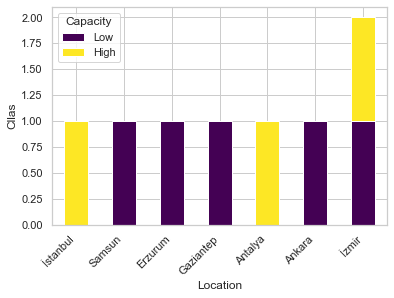

In [45]:
# Çubuk grafik (bar plot) oluşturalim
df_capacity.set_index('Location', inplace=True)

sns.set(style="whitegrid")
ax = df_capacity.plot(kind='bar', stacked=True, colormap='viridis')

ax.legend(title='Capacity')
ax.set_ylabel('Cllas')
ax.set_xticklabels(df_capacity.index, rotation=45, ha='right')  

plt.show()